In [ ]:
# Analysis I: Predict House Price Changes of Different Boroughs Over London for Yearly Housing Dataset

In [ ]:
# Import libraries used for data exploration, visualization, and analysis of the listings dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd 
import statistics
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

     |████████████████████████████████| 962kB 3.3MB/s 
     |████████████████████████████████| 10.9MB 15.8MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 


In [ ]:
# Data PREPARATION

In [ ]:
# I) DATA COLLECTION AND LOADING

In [ ]:
# Using pandas library and 'read_csv' function to read the Yearly Housing Dataset into Python.

y_housing = pd.read_csv('housing_in_london_yearly_variables.csv')

In [ ]:
# Displays the first 10 rows from the yearly housing dataset with all variables as example.

print('London Yearly Housing Dataset')
y_housing.head(10)

London Yearly Housing Dataset


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1
5,E09000006,bromley,1999-12-01,16720.0,NaN,21293,13,294902.0,NaN,NaN,NaN,1
6,E09000007,camden,1999-12-01,23677.0,NaN,30249,13,190003.0,NaN,NaN,NaN,1
7,E09000008,croydon,1999-12-01,19563.0,NaN,22205,13,332066.0,NaN,NaN,NaN,1
8,E09000009,ealing,1999-12-01,20580.0,NaN,25046,12,302252.0,NaN,NaN,NaN,1
9,E09000010,enfield,1999-12-01,19289.0,NaN,21006,9,272731.0,NaN,NaN,NaN,1


In [ ]:
# II) BASIC DATA EXPLORATION

In [ ]:
# Displays all the columns(variables) from the yearly housing dataset.

y_housing.columns

Index(['code', 'area', 'date', 'median_salary', 'life_satisfaction',
       'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs',
       'area_size', 'no_of_houses', 'borough_flag'],
      dtype='object')

In [ ]:
# Prints the number of variables and observations of the yearly housing dataset.

print('Number of variables: {}'.format(y_housing.shape[1]))
print('Number of observations: {}'.format(y_housing.shape[0]))

Number of variables: 12
Number of observations: 1071


In [ ]:
# Shows the datatype of the variables for yearly housing dataset.

y_housing.dtypes

code                  object
area                  object
date                  object
median_salary        float64
life_satisfaction    float64
mean_salary           object
recycling_pct         object
population_size      float64
number_of_jobs       float64
area_size            float64
no_of_houses         float64
borough_flag           int64
dtype: object

In [ ]:
# Shows the Number of Columns, Number of Observations, Variable Name, Data Types, etc. for yearly housing dataset. 

y_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [ ]:
# code - Code of the area.
# area - Area the record describes. 
# date - Time period the record refers to.
# median_salary - Median salary of the individuals living in the area.
# life_satisfaction - Life satisfaction of the individuals living in the area.
# mean_salary - Mean salary of the individuals living in the area.
# recycling_pct - Percentage of households recycling.
# population_size - Number of people living in the area. 
# number_of_jobs - Number of jobs in the area.
# area_size - Area size in hectares.
# no_of_houses - Number of houses in the area.
# borough_flag - Flag to indicate if the area is a borough of London.

In [ ]:
# Shows the basic statistics of the float and int variables for the yearly housing dataset.

y_housing.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
count,1049.000000,352.000000,1.018000e+03,9.310000e+02,6.660000e+02,6.660000e+02,1071.000000
mean,27977.792183,7.485057,6.042576e+06,3.188095e+06,3.724903e+05,8.814682e+05,0.647059
std,6412.807487,0.198451,1.526810e+07,8.058302e+06,2.157060e+06,3.690376e+06,0.478108
min,15684.000000,7.000000,6.581000e+03,4.700000e+04,3.150000e+02,5.009000e+03,0.000000
25%,23857.000000,7.350000,2.243458e+05,9.450000e+04,2.960000e+03,8.763550e+04,0.000000
50%,27441.000000,7.510000,2.946035e+05,1.570000e+05,4.323000e+03,1.024020e+05,1.000000
75%,30932.000000,7.640000,4.630098e+06,2.217000e+06,8.220000e+03,1.262760e+05,1.000000
max,61636.000000,7.960000,6.643555e+07,3.575000e+07,1.330373e+07,2.417217e+07,1.000000


In [ ]:
# III: DATA CLEANING

In [ ]:
# Dropping unused/unwanted columns(variables)

y_housing.drop(['code', 'median_salary', 'recycling_pct', 'life_satisfaction', 'area_size', 'no_of_houses'], axis = 1, inplace = True)
y_housing.head(10)

,area,date,mean_salary,population_size,number_of_jobs,borough_flag
0,city of london,1999-12-01,48922,6581.0,NaN,1
1,barking and dagenham,1999-12-01,23620,162444.0,NaN,1
2,barnet,1999-12-01,23128,313469.0,NaN,1
3,bexley,1999-12-01,21386,217458.0,NaN,1
4,brent,1999-12-01,20911,260317.0,NaN,1
5,bromley,1999-12-01,21293,294902.0,NaN,1
6,camden,1999-12-01,30249,190003.0,NaN,1
7,croydon,1999-12-01,22205,332066.0,NaN,1
8,ealing,1999-12-01,25046,302252.0,NaN,1
9,enfield,1999-12-01,21006,272731.0,NaN,1


In [ ]:
# Shows london boroughs

print('\nHere are the boroughs of London.')
y_housing[y_housing['borough_flag'] == 1]['area'].unique()


Here are the boroughs of London.


array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster'], dtype=object)

In [ ]:
# Shows area not of london boroughs

print('\nWe can see that some of the data does not make sense. For example, how is London itself not a borough of London?\nPlus, inner london and outer london are already seperated by name in borough_flag = 1, and it is a part of london borough.\nWith that said, borough_flag = 0 is discarded.\n')
y_housing[y_housing['borough_flag'] == 0]['area'].unique()


We can see that some of the data does not make sense. For example, how is London itself not a borough of London?
Plus, inner london and outer london are already seperated by name in borough_flag = 1, and it is a part of london borough.
With that said, borough_flag = 0 is discarded.



array(['north east', 'north west', 'yorkshire and the humber',
       'east midlands', 'west midlands', 'east', 'london', 'south east',
       'south west', 'inner london', 'outer london', 'england',
       'united kingdom', 'great britain', 'england and wales',
       'northern ireland', 'scotland', 'wales'], dtype=object)

In [ ]:
# filter out borough_flag == 0, use == 1

y_housing_london = y_housing[y_housing['borough_flag'] == 1]

y_housing_london.head()

,area,date,mean_salary,population_size,number_of_jobs,borough_flag
0,city of london,1999-12-01,48922,6581.0,NaN,1
1,barking and dagenham,1999-12-01,23620,162444.0,NaN,1
2,barnet,1999-12-01,23128,313469.0,NaN,1
3,bexley,1999-12-01,21386,217458.0,NaN,1
4,brent,1999-12-01,20911,260317.0,NaN,1


In [ ]:
# Replace '-', '#', 'na', 'nan' to NaN values

y_housing_london.replace(['-', '#', 'na', 'nan'], np.nan, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Checking which variable contains null or missing values for yearly housing dataset.

y_housing_london.isnull().sum()

area                0
date                0
mean_salary         7
population_size    33
number_of_jobs     66
borough_flag        0
dtype: int64

In [ ]:
#Checking the percentage of the null or missing values of the variables for yearly housing dataset.

100 * y_housing_london.isnull().sum() / len(y_housing_london)

area               0.000000
date               0.000000
mean_salary        1.010101
population_size    4.761905
number_of_jobs     9.523810
borough_flag       0.000000
dtype: float64

In [ ]:
# Change date and mean_salary datatypes

y_housing_london['date'] = pd.to_datetime(y_housing_london['date'])
y_housing_london['mean_salary'] = y_housing_london['mean_salary'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Use the ffill and bfill to fill the nan values 

y_housing_london = y_housing_london.fillna(method = 'ffill')
y_housing_london = y_housing_london.fillna(method = 'bfill')

y_housing_london.head()

,area,date,mean_salary,population_size,number_of_jobs,borough_flag
0,city of london,1999-12-01,48922.0,6581.0,361000.0,1
1,barking and dagenham,1999-12-01,23620.0,162444.0,361000.0,1
2,barnet,1999-12-01,23128.0,313469.0,361000.0,1
3,bexley,1999-12-01,21386.0,217458.0,361000.0,1
4,brent,1999-12-01,20911.0,260317.0,361000.0,1


In [ ]:
# Shows the Number of Columns, Number of Observations, Variable Name, Data Types, etc for yearly housing dataset after Data Cleaning.

print("After Data Cleaning, the datatypes and missing values are settled.\n")
y_housing_london.info()

After Data Cleaning, the datatypes and missing values are settled.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 1052
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   area             693 non-null    object        
 1   date             693 non-null    datetime64[ns]
 2   mean_salary      693 non-null    float64       
 3   population_size  693 non-null    float64       
 4   number_of_jobs   693 non-null    float64       
 5   borough_flag     693 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 37.9+ KB


In [ ]:
# Shows basic statistics of yearly housing dataset after data cleaning.

print('Basic statistics after Data Cleaning\n')
y_housing_london.describe()

Basic statistics after Data Cleaning



,mean_salary,population_size,number_of_jobs,borough_flag
count,693.000000,693.000000,693.000000,693.0
mean,36516.350649,241893.490620,193317.460317,1.0
std,11804.576125,66803.445489,179844.160858,0.0
min,18786.000000,6581.000000,47000.000000,1.0
25%,29957.000000,203381.000000,84000.000000,1.0
50%,33513.000000,247614.000000,130000.000000,1.0
75%,39617.000000,283777.000000,197000.000000,1.0
max,90842.000000,392140.000000,775000.000000,1.0


In [ ]:

y_housing_london[y_housing_london['area'] == 'city of london']

,area,date,mean_salary,population_size,number_of_jobs,borough_flag
0,city of london,1999-12-01,48922.0,6581.0,361000.0,1
51,city of london,2000-12-01,52203.0,7014.0,361000.0,1
102,city of london,2001-12-01,62819.0,7359.0,339000.0,1
153,city of london,2002-12-01,56450.0,7280.0,344000.0,1
204,city of london,2003-12-01,64272.0,7115.0,344000.0,1
255,city of london,2004-12-01,66628.0,7118.0,332000.0,1
306,city of london,2005-12-01,74004.0,7131.0,343000.0,1
357,city of london,2006-12-01,85886.0,7254.0,337000.0,1
408,city of london,2007-12-01,86778.0,7607.0,350000.0,1
459,city of london,2008-12-01,82973.0,7429.0,348000.0,1


In [ ]:
y_housing_london[y_housing_london['area'] == 'city of london']

,area,date,mean_salary,population_size,number_of_jobs,borough_flag
0,city of london,1999-12-01,48922.0,6581.0,361000.0,1
51,city of london,2000-12-01,52203.0,7014.0,361000.0,1
102,city of london,2001-12-01,62819.0,7359.0,339000.0,1
153,city of london,2002-12-01,56450.0,7280.0,344000.0,1
204,city of london,2003-12-01,64272.0,7115.0,344000.0,1
255,city of london,2004-12-01,66628.0,7118.0,332000.0,1
306,city of london,2005-12-01,74004.0,7131.0,343000.0,1
357,city of london,2006-12-01,85886.0,7254.0,337000.0,1
408,city of london,2007-12-01,86778.0,7607.0,350000.0,1
459,city of london,2008-12-01,82973.0,7429.0,348000.0,1


In [ ]:
# DATA PROCESSING

In [ ]:
# Set date as index for easier manipulation

y_housing_london = y_housing_london.set_index(y_housing_london['date'])

del y_housing_london['date']

y_housing_london.head()

,area,mean_salary,population_size,number_of_jobs,borough_flag
date,,,,,
1999-12-01,city of london,48922.0,6581.0,361000.0,1
1999-12-01,barking and dagenham,23620.0,162444.0,361000.0,1
1999-12-01,barnet,23128.0,313469.0,361000.0,1
1999-12-01,bexley,21386.0,217458.0,361000.0,1
1999-12-01,brent,20911.0,260317.0,361000.0,1


In [ ]:
y_housing_london_mean_area = y_housing_london.groupby('area').mean().reset_index()

y_housing_london_mean_area.head(100)

,area,mean_salary,population_size,number_of_jobs,borough_flag
0,barking and dagenham,31466.666667,184867.047619,104428.571429,1
1,barnet,32447.095238,343381.285714,188666.666667,1
2,bexley,29391.904762,230952.285714,125904.761905,1
3,brent,30128.047619,293254.714286,166285.714286,1
4,bromley,30622.285714,306307.142857,167000.000000,1
5,camden,42074.523810,221125.619048,349666.666667,1
6,city of london,76378.571429,19394.238095,439190.476190,1
7,croydon,31668.904762,350608.285714,186714.285714,1
8,ealing,32662.047619,322240.476190,184047.619048,1
9,enfield,30008.714286,299938.666667,158952.380952,1


In [ ]:
# save clean dataset

y_housing_london.to_csv(r'C:\Users\user\Desktop\Sem 6\IST 3144 Problem Solving Using Analytics Tools\PS Assignments & CW\Cleaned_yearly.csv', header = True)


In [ ]:
#DATA ANALYSIS

In [ ]:
fig = px.box(y_housing_london, x='area', y='mean_salary')
fig.update_layout(
    template='gridon',
    title='Average Yearly Salary to the area of borough flag 1',
    xaxis_title='Area',
    yaxis_title='Average Salary (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()

In [ ]:
fig = px.scatter(y_housing_london, x=y_housing_london.index, y='mean_salary', color='area', size='mean_salary')
fig.update_layout(
    template='plotly_dark',
    title='Average salary over Years to the area of borough flag 1',
    xaxis_title='Year',
    yaxis_title='Average Salary (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
# Show plot 
fig.show()

In [ ]:
trace1 = go.Bar(
                x = y_housing_london_mean_area.area,
                y = y_housing_london_mean_area.mean_salary,
                name = "Mean salary (£)",
                marker = dict(color = 'rgba(8, 103, 103, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = y_housing_london_mean_area.area)

data = [trace1]
layout = go.Layout(barmode = "group", title="Average Yearly Salary per Borough")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, ticklen=10,title_text="Boroughs of London")
iplot(fig)

In [ ]:
trace1 = go.Bar(
                x = y_housing_london_mean_area.area,
                y = y_housing_london_mean_area.number_of_jobs,
                name = "Number of Jobs",
                marker = dict(color = 'rgba(8, 103, 103, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = y_housing_london_mean_area.area)
trace2 = go.Bar(
                x = y_housing_london_mean_area.area,
                y = y_housing_london_mean_area.population_size,
                name = "Population size",
                marker = dict(color = 'rgba(103, 8, 8, 0.7)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = y_housing_london_mean_area.area)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Average Population Size and Number of Jobs per Borough")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, ticklen=10,title_text="Boroughs of London")
iplot(fig)

In [ ]:
fig = px.pie(y_housing_london, names='area', values='population_size', color='area')
fig.update_layout(
    template='plotly_white',
    title='Population distribution to area of borough flag 1'
)
fig.show()

In [ ]:
y_housing_london_mean_price = y_housing_london.groupby('date')['mean_salary'].mean()

y_housing_london_mean_price.head()

date
1999-12-01    26053.545455
2000-12-01    27729.545455
2001-12-01    29622.121212
2002-12-01    30649.151515
2003-12-01    31986.333333
Name: mean_salary, dtype: float64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_housing_london_mean_price.index, 
                         y=y_housing_london_mean_price.values,
                         mode='lines',
                         name='London Mean Salary',
                        ))

fig.update_layout(
    template='gridon',
    title='Average Yearly Mean Salary',
    xaxis_title='Year',
    yaxis_title='Mean Salary (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    legend=dict(y=-.2, orientation='h'),
    shapes=[
        dict(
            type="line",
            x0='2016-06-01',
            x1='2016-06-01',
            y0=0,
            y1=y_housing_london_mean_price.values.max()*1.2,
            line=dict(
            color="red",
            dash="dashdot"
            )
        ),
        dict(
            type="rect",
            x0="2007-12-01",
            y0=0,
            x1="2009-06-01",
            y1=y_housing_london_mean_price.values.max()*1.2,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="rect",
            x0="2001-03-01",
            y0=0,
            x1="2001-11-01",
            y1=y_housing_london_mean_price.values.max()*1.2,
            fillcolor="violet",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
            dict(text="The Great Recession", x='2007-12-01', y=y_housing_london_mean_price.values.max()*1.2),
            dict(text="Brexit Vote", x='2016-06-01', y=y_housing_london_mean_price.values.max()*1.2),
            dict(text="Dot-Com Bubble Recession", x='2001-03-01', y=y_housing_london_mean_price.values.max()*1.2)
    ]
)

fig.show()

In [ ]:
#importing the map shape file from london-borough-and-ward-boundaries-up-to-2014
l_map = gpd.read_file('/content/datasets_437896_831845_London_Wards_Boroughs_London_Borough_Excluding_MHW.shp')

#Filtering out the data we need
l_map = l_map[['NAME', 'geometry']]

#l_map['NAME']==london['area']
l_map = l_map.rename(columns = {'NAME' : 'area'})
l_map['area'] = l_map['area'].str.lower()
l_map['area'] = l_map['area'].str.replace('&', 'and')

#joining
london_map = l_map.set_index('area').join(y_housing_london.set_index('area'))
london_map.head()

,geometry,mean_salary,population_size,number_of_jobs,borough_flag
area,,,,,
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",23620.0,162444.0,361000.0,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",24696.0,163893.0,57000.0,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",26050.0,165654.0,54000.0,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",26653.0,166357.0,52000.0,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",27792.0,166210.0,55000.0,1


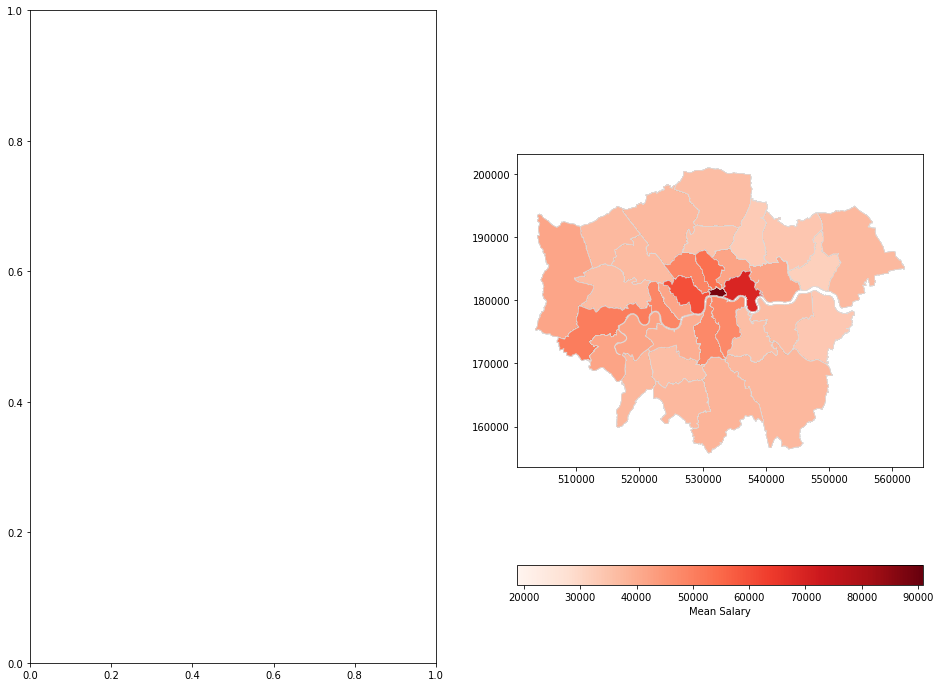

In [ ]:
#visualing

fig, axarr = plt.subplots(1, 2, figsize=(16, 12))
london_map.plot(column='mean_salary', cmap='Reds', linewidth=0.5, ax=axarr[1], edgecolor='gainsboro', legend=True, legend_kwds={'label': "Mean Salary", 'orientation' : "horizontal"})

plt.show()